# **Prediksi Keausan Mesin**

Moch Alfan Miftachul Huda

UIN Maulana Malik Ibrahim Malang

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

# **Import Dataset**

In [49]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/SIC/ai4i2020.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd

df = pd.read_csv(file_path)
df.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


# **Data Understanding**

In [51]:

df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [52]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

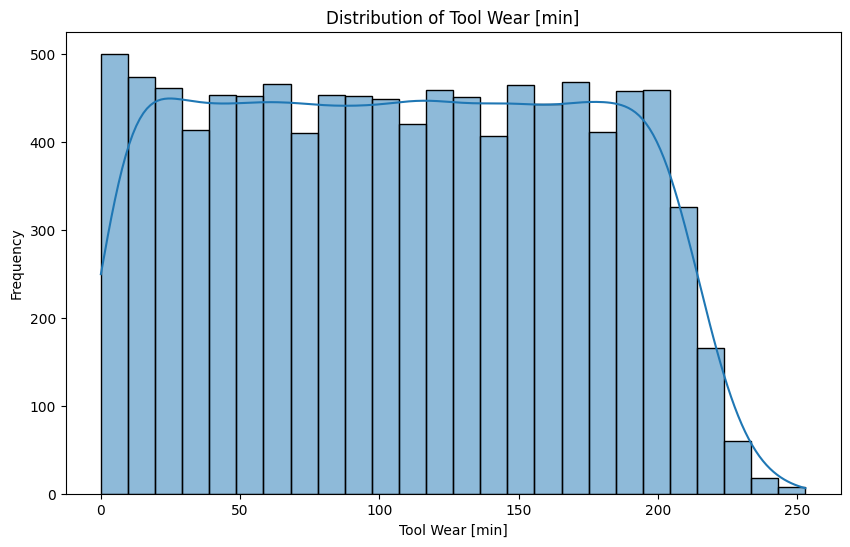

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tool wear [min]'], kde=True)
plt.title('Distribution of Tool Wear [min]')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Frequency')
plt.show()

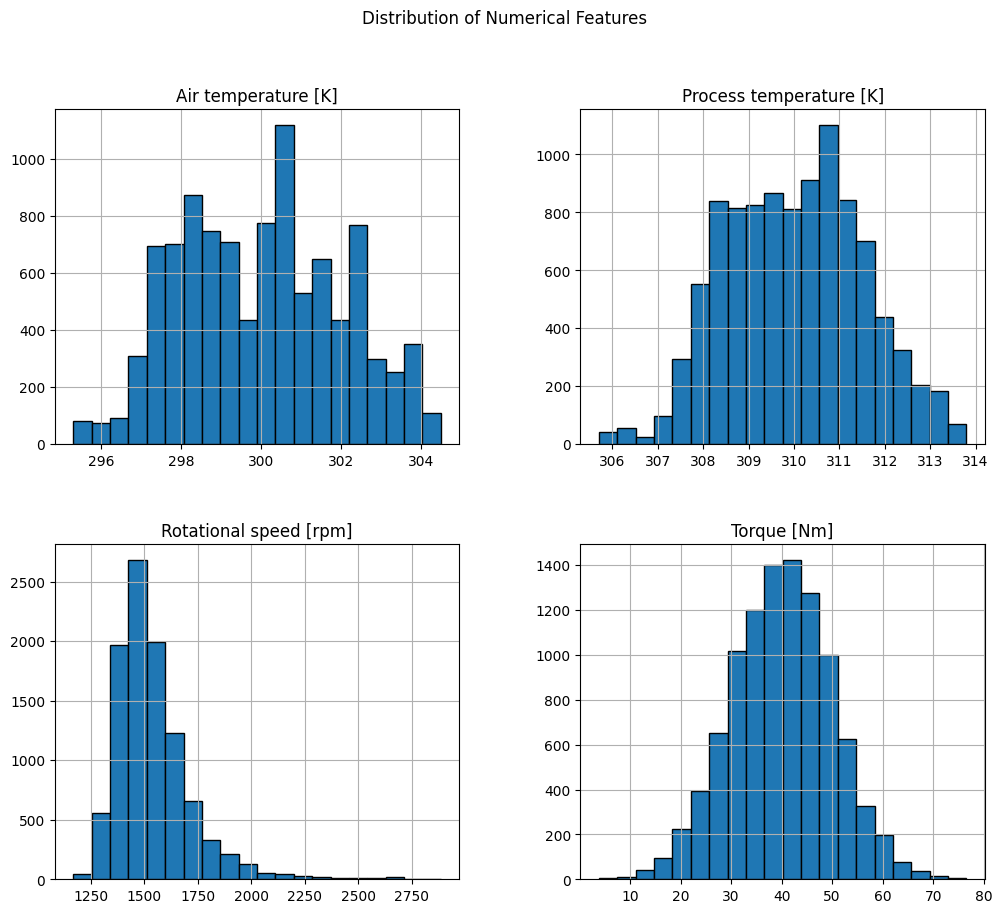

In [54]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']
df[numerical_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

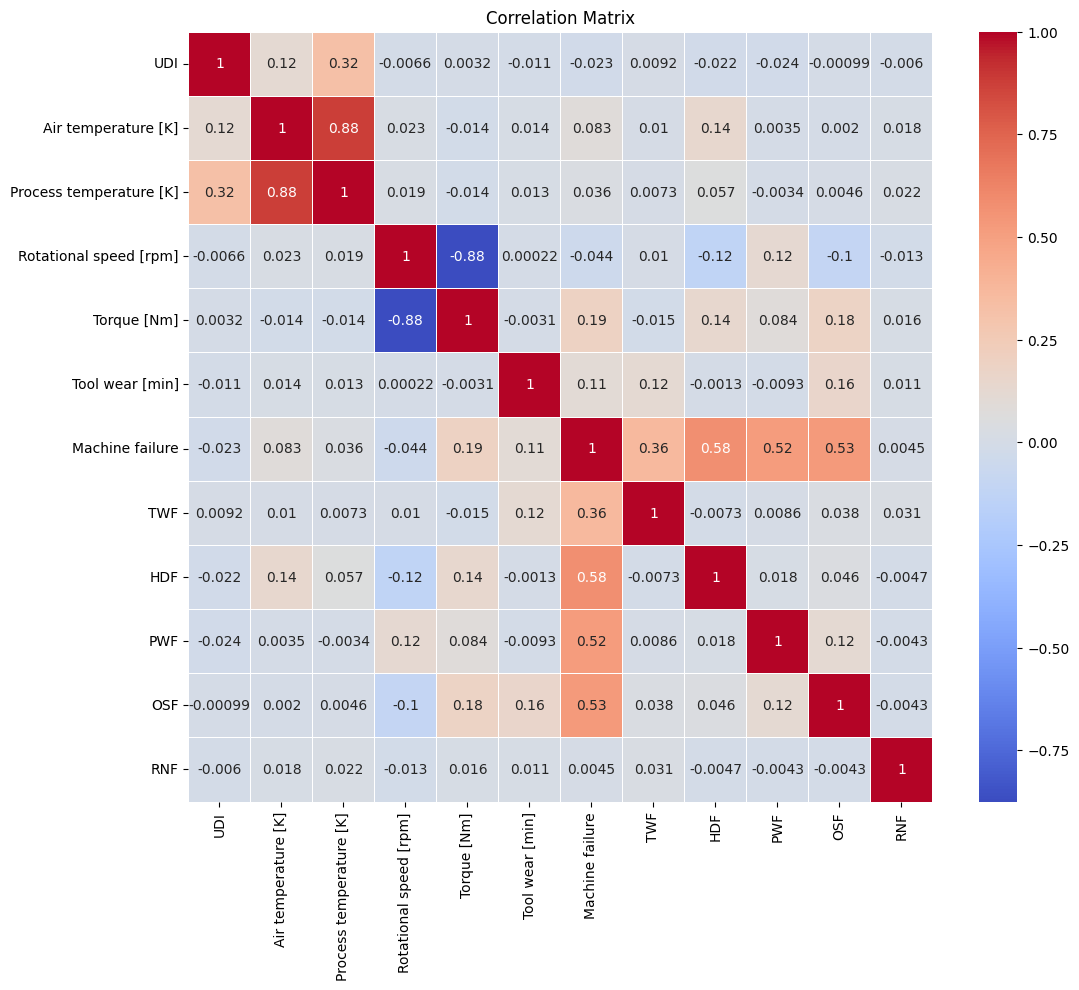

In [55]:
# Filter the DataFrame to include only numeric columns for correlation calculation
numeric_data = df.select_dtypes(include=[np.number])

# Visualize correlations between features and the target variable
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Label Encoding**

In [56]:
# Encode 'Type' using LabelEncoder
# mengubah nilai type menjadi numerik untuk setiap tipe H,L,M
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

print("Encoded 'Type' using LabelEncoder:")
print(df[['Type', 'Type_encoded']])

# One-hot encode 'Type' using pd.get_dummies
df = pd.get_dummies(df, columns=['Type'])

print("\nOne-hot encoded 'Type':")
print(df.head())

Encoded 'Type' using LabelEncoder:
     Type  Type_encoded
0       M             2
1       L             1
2       L             1
3       L             1
4       L             1
...   ...           ...
9995    M             2
9996    H             0
9997    M             2
9998    H             0
9999    M             2

[10000 rows x 2 columns]

One-hot encoded 'Type':
   UDI Product ID  Air temperature [K]  Process temperature [K]  \
0    1     M14860                298.1                    308.6   
1    2     L47181                298.2                    308.7   
2    3     L47182                298.1                    308.5   
3    4     L47183                298.2                    308.6   
4    5     L47184                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3      

In [57]:
print(df.columns)

Index(['UDI', 'Product ID', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_encoded',
       'Type_H', 'Type_L', 'Type_M'],
      dtype='object')


# **Preprocessing Data**

In [58]:
#memilih fitur-fitur yang relevan
features = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Type_H', 'Type_L', 'Type_M']]
target = df['Tool wear [min]']

In [59]:
# Split data menjadi training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Training Model menggunakan Regresi Linier**

In [61]:
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

# **Evaluasi Model**

Mean Squared Error (MSE): 3981.2097
R-squared (R2): -0.0046


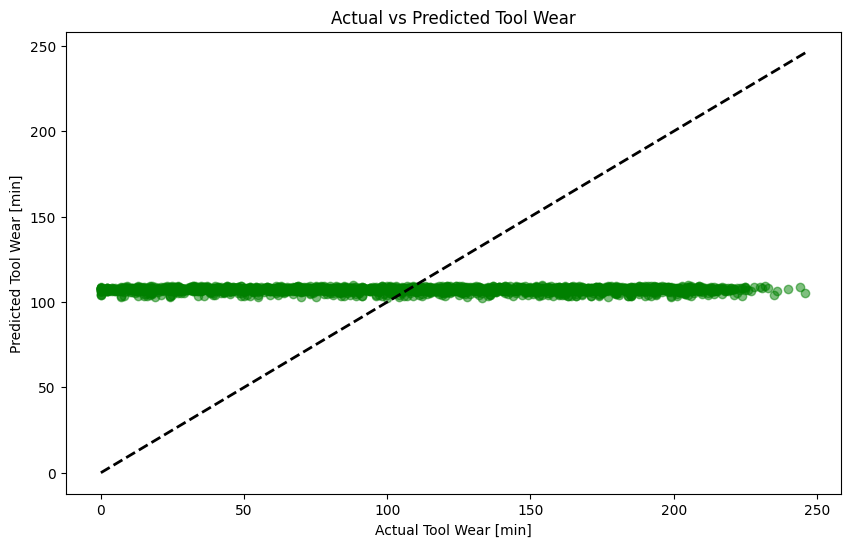

In [67]:
# Predict on test set
y_predicted = linear_model.predict(X_test_scaled)

# Evaluate model performance
mse_value = mean_squared_error(y_test, y_predicted)
r2_value = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"R-squared (R2): {r2_value:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Tool Wear [min]')
plt.ylabel('Predicted Tool Wear [min]')
plt.title('Actual vs Predicted Tool Wear')
plt.show()

# **Prediksi Data**

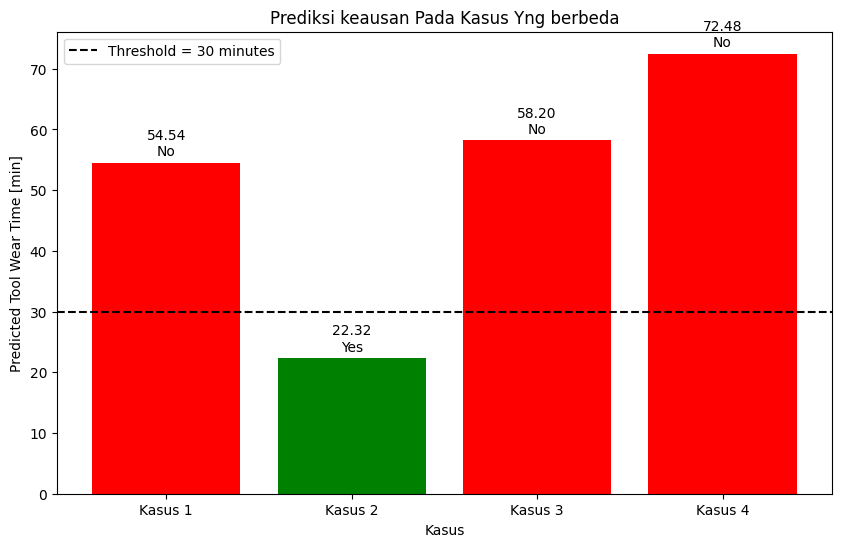

Kasus 1: Waktu keausan pahat yang diprediksi adalah 54.54 menit. Pemeliharaan terjadwal diperlukan: No.
Kasus 2: Waktu keausan pahat yang diprediksi adalah 22.32 menit. Pemeliharaan terjadwal diperlukan: Yes.
Kasus 3: Waktu keausan pahat yang diprediksi adalah 58.20 menit. Pemeliharaan terjadwal diperlukan: No.
Kasus 4: Waktu keausan pahat yang diprediksi adalah 72.48 menit. Pemeliharaan terjadwal diperlukan: No.


In [66]:

def predict_wear_time(input_features):
    input_df = pd.DataFrame([input_features], columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Type_H', 'Type_L', 'Type_M'])
    input_scaled = scaler.transform(input_df)
    prediction = linear_model.predict(input_scaled)
    return prediction[0]


test_data_points = [
    [200.1, 200.2, 1100, 65.8, 0, 0, 1],
    [150.5, 110.0, 1000, 40.0, 0, 1, 0],
    [250.0, 160.0, 1200, 50.0, 1, 0, 0],
    [200.3, 280.5, 900, 55.5, 0, 1, 0]
]

# Predict wear time for each scenario and visualize the results
predicted_times = [predict_wear_time(point) for point in test_data_points]

# Maintenance scheduling based on predicted wear time
maintenance_threshold = 30  # Set maintenance threshold in minutes
maintenance_needed = ["Yes" if time <= maintenance_threshold else "No" for time in predicted_times]

# Visualize the results
scenarios = [f"Kasus {i+1}" for i in range(len(test_data_points))]
plt.figure(figsize=(10, 6))
bars = plt.bar(scenarios, predicted_times, color=['green' if time <= maintenance_threshold else 'red' for time in predicted_times])
plt.axhline(y=maintenance_threshold, color='black', linestyle='--', label=f'Threshold = {maintenance_threshold} minutes')
plt.xlabel('Kasus')
plt.ylabel('Predicted Tool Wear Time [min]')
plt.title('Prediksi keausan Pada Kasus Yng berbeda')
plt.legend()

for bar, label in zip(bars, maintenance_needed):
    height = bar.get_height()
    plt.annotate(f'{height:.2f}\n{label}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


for i, (predicted_time, maintenance) in enumerate(zip(predicted_times, maintenance_needed), start=1):
    print(f"Kasus {i}: Waktu keausan pahat yang diprediksi adalah {predicted_time:.2f} menit. Pemeliharaan terjadwal diperlukan: {maintenance}.")